In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


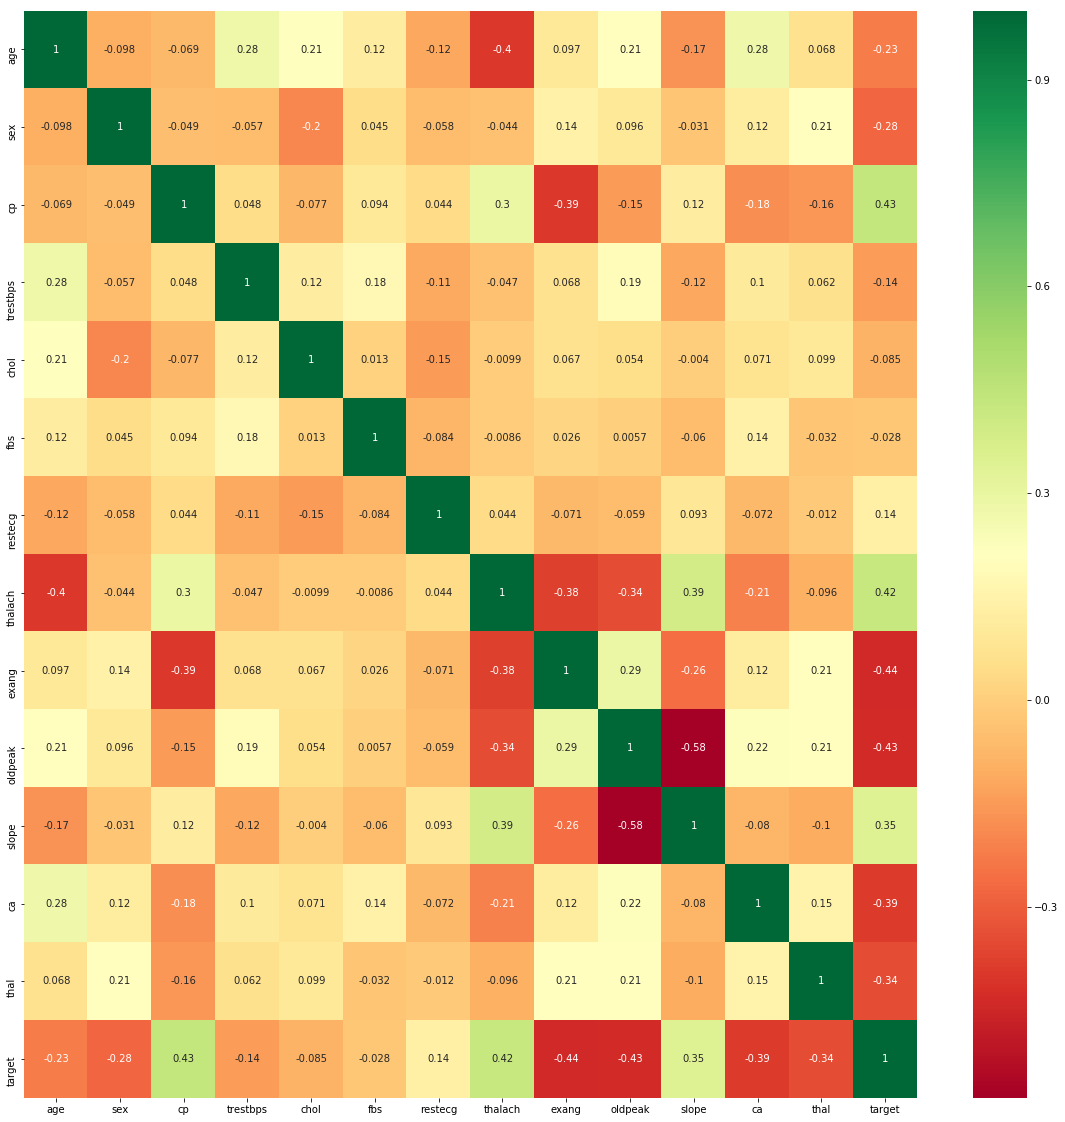

In [5]:
#feature Selection:
corr=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,cmap='RdYlGn')

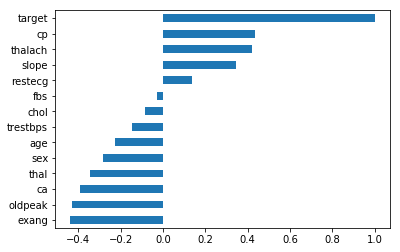

In [6]:
corr['target'].sort_values().plot(kind='barh')

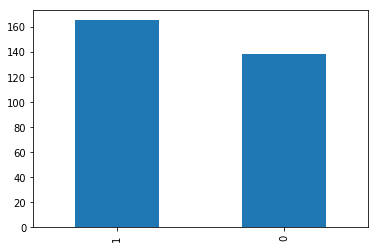

In [7]:
#Distribution of target variable:
df['target'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Sex Wise Disease Analysis')

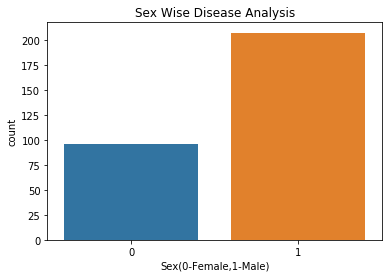

In [14]:
#How many men and women are there:
sns.countplot(x='sex',data=df)
plt.xlabel("Sex(0-Female,1-Male)")
plt.title('Sex Wise Disease Analysis')

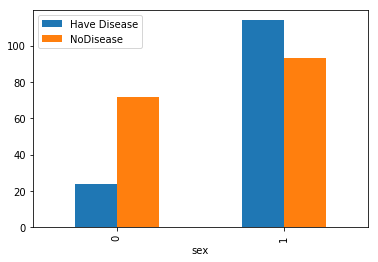

In [13]:
pd.crosstab(df['sex'],df['target']).plot(kind='bar')
plt.legend(['Have Disease','NoDisease'])
plt.xlabel("Sex(0-Female,1-Male)")

Text(0.5, 0, 'Age')

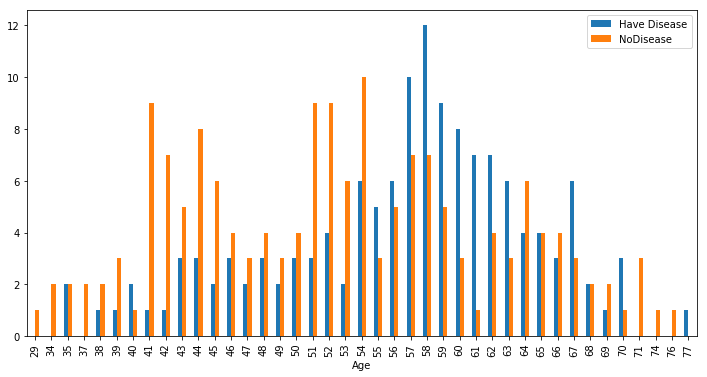

In [17]:
pd.crosstab(df['age'],df['target']).plot(kind='bar',figsize=(12,6))
plt.legend(['Have Disease','NoDisease'])
plt.xlabel('Age')

Text(0.5, 0, 'Slope')

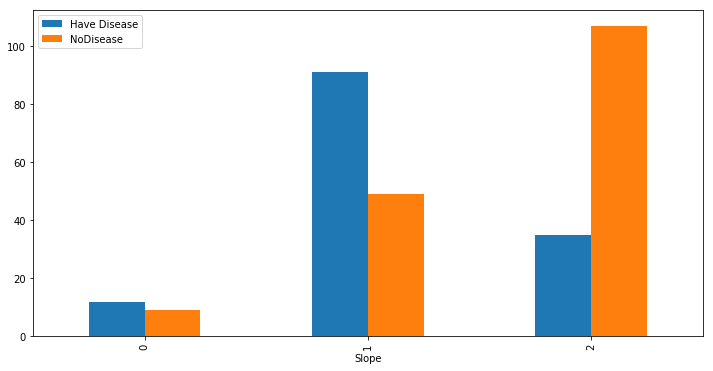

In [19]:
pd.crosstab(df['slope'],df['target']).plot(kind='bar',figsize=(12,6))
plt.legend(['Have Disease','NoDisease'])
plt.xlabel('Slope')

In [20]:
#Data Preprocessing:
#columns=['sex','cp','fbs','restecg','exang','slope','thal','ca']
dataset=pd.get_dummies(df,columns=['sex','cp','fbs','restecg','exang','slope','thal','ca'])

In [21]:
columns_to_scale=['age','trestbps','chol','oldpeak','thalach']
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
dataset[columns_to_scale]=scale.fit_transform(df[columns_to_scale])

C:\Users\sagar.narula\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sagar.narula\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [ ]:
#dataset['thalach']=scale.fit_transform(dataset['thalach'])

In [22]:
dataset.head()
X=dataset.drop(['target'],axis=1)
X

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,thal_0,thal_1,thal_2,thal_3,ca_0,ca_1,ca_2,ca_3,ca_4
0,0.952197,0.763956,-0.256334,0.015443,1.087338,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,0,1,0,...,1,0,0,1,0,1,0,0,0,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0,1,0,1,0,...,1,0,0,1,0,1,0,0,0,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,0,1,0,0,...,1,0,0,1,0,1,0,0,0,0
5,0.290464,0.478391,-1.048678,-0.072018,-0.551783,0,1,1,0,0,...,0,0,1,0,0,1,0,0,0,0
6,0.180175,0.478391,0.922521,0.146634,0.224643,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7,-1.143291,-0.663867,0.323431,1.021244,-0.896862,0,1,0,1,0,...,1,0,0,0,1,1,0,0,0,0
8,-0.260980,2.306004,-0.913400,0.540209,-0.465514,0,1,0,0,1,...,1,0,0,0,1,1,0,0,0,0
9,0.290464,1.049520,-1.512490,1.064975,0.483451,0,1,0,0,1,...,1,0,0,1,0,1,0,0,0,0


In [23]:
Y=df['target']
Y

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
273    0
274    0
275    0
276    0
277    0
278    0
279    0
280    0
281    0
282    0
283    0
284    0
285    0
286    0
287    0
288    0
289    0
290    0
291    0
292    0
293    0
294    0
295    0
296    0
297    0
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [25]:
knn_scores=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X,Y,cv=10)
    knn_scores.append(score.mean())
#print(knn_scores)    

Text(0, 0.5, 'Scores')

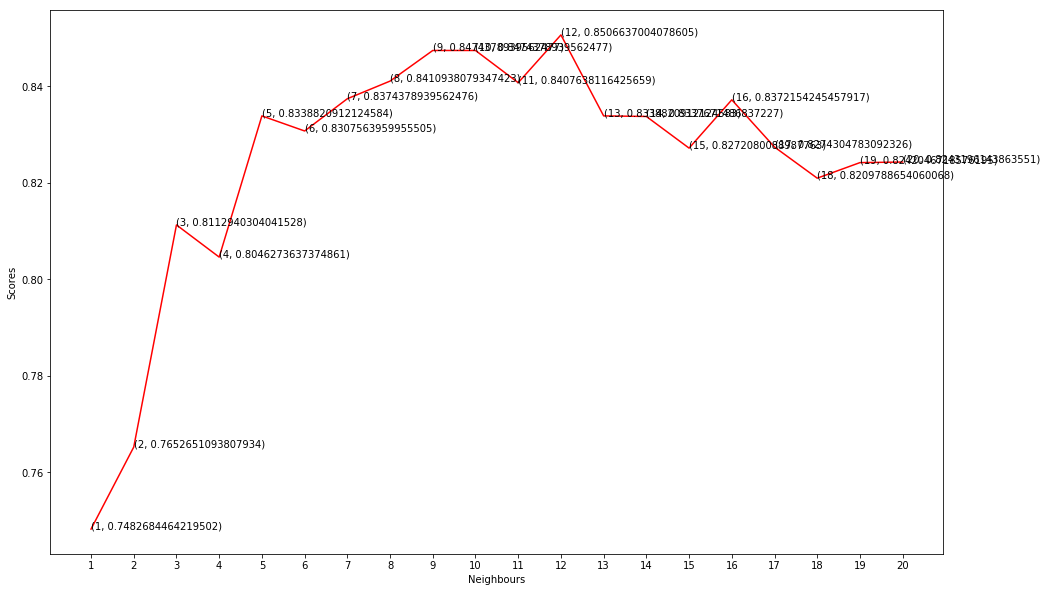

In [26]:
plt.figure(figsize=(16,10))
plt.plot([i for i in range(1,21)],knn_scores,color='red')
for i in range(1,21):
    plt.text(i,knn_scores[i-1],(i,knn_scores[i-1]))
plt.xticks([i for i in range(1,21)])
plt.xlabel('Neighbours')
plt.ylabel('Scores')


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.20, random_state=42)

In [28]:
#using the no of neighbours as 12:
knn=KNeighborsClassifier(n_neighbors=12)

In [30]:
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
print('The accuracy of knn is {}'.format(accuracy_score(y_test,y_pred_knn)))

The accuracy of knn is 0.9016393442622951


In [31]:
#Using Logistic Regression:
ls=LogisticRegression()
ls.fit(X_train,y_train)
y_pred_ls=ls.predict(X_test)
print('The accuracy of ls on test data is {}'.format(accuracy_score(y_test,y_pred_ls)))

The accuracy of ls on test data is 0.8852459016393442


C:\Users\sagar.narula\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8857758620689655

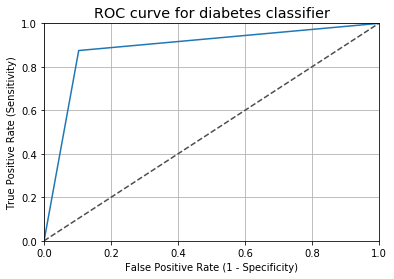

In [33]:
#Checking the AUC-ROC metrics for logistics Regression
from sklearn.metrics import roc_curve,auc
fpr,tpr,threshold=roc_curve(y_test,y_pred_ls)
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1],ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
auc(fpr,tpr)

In [34]:
#Using Decision Tree Classifier:
dsc=DecisionTreeClassifier()
dsc.fit(X_train,y_train)
y_pred_dsc=dsc.predict(X_test)
print('The accuracy of Decision tree on test data is {}'.format(accuracy_score(y_test,y_pred_dsc)))

The accuracy of Decision tree on test data is 0.819672131147541
